In [1]:
import pandas as pd
import numpy as np


In [90]:
sample = pd.read_csv("sample.csv")
column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
sample.columns = column_names
sample.head()

,dataset,start_date,start_time,duration,reverseDelta,IoTMac,hostMac,IoTIP,IoTIP_int,hostIP,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,reverseBytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,AvgPacketSize,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others,year_month
0,google_home_gen1_2019_08.csv,2019-08-12,21:01:27.25,0.000,0.000,48:d6:d5:92:96:a2:,38:d5:47:0c:25:d4:,192.168.1.184,3232235960,192.168.1.1,3232235777,17,33789,53,1,75,0,0,1,0,1,47,0,47,47,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2019_08
1,planex_camera_one_shot!_2019_09.csv,2019-09-19,06:31:15.204,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,46713,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_09
2,sony_bravia_2019_08.csv,2019-08-16,02:58:57.694,0.434,0.012,04:5d:4b:a4:d0:2e:,38:d5:47:0c:25:d4:,192.168.1.124,3232235900,74.125.102.41,1249732137,6,53460,443,18,1986,18,18612,1,1,4,1030,21,188,685,253,54,257,0,13,13,17668,24,1396,2792,803,55,1359,1,1,0,0,1,0,0,1,0,2019_08
3,planex_camera_one_shot!_2019_07.csv,2019-07-29,03:03:10.832,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,48008,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_07
4,jvc_kenwood_cu-hb1_2019_07.csv,2019-07-10,16:02:39.688,0.001,0.001,00:a2:b2:b9:09:87:,38:d5:47:0c:25:d4:,192.168.1.186,3232235962,192.168.1.1,3232235777,17,39289,53,1,71,1,170,1,0,1,43,0,43,43,0,0,43,0,0,1,142,0,142,142,0,0,142,1,0,0,0,0,1,0,0,0,2019_07


In [3]:
sample.shape

(9999, 48)

In [4]:
sample.columns

Index(['planex_camera_one_shot!_2019_09.csv', '2019-09-25', '06:50:15.934',
       '0', '0.1', '00:1b:c7:fa:c3:e6:', '01:00:5e:7f:ff:fa:', '192.168.1.236',
       '3232236012', '239.255.255.250', '4026531834', '17', '33033', '1900',
       '1', '294', '0.2', '0.3', '0.4', '1.1', '1.2', '266', '0.5', '266.1',
       '266.2', '0.6', '0.7', '266.3', '0.8', '0.9', '0.10', '0.11', '0.12',
       '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '1.3', '0.19', '0.20',
       '0.21', '0.22', '0.23', '0.24', '1.4', '2019_09'],
      dtype='object')

In [46]:
column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
sample.columns = column_names

In [47]:
sample.head()

,dataset,start_date,start_time,duration,reverseDelta,IoTMac,hostMac,IoTIP,IoTIP_int,hostIP,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,reverseBytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,AvgPacketSize,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others,year_month
0,google_home_gen1_2019_08.csv,2019-08-12,21:01:27.25,0.000,0.000,48:d6:d5:92:96:a2:,38:d5:47:0c:25:d4:,192.168.1.184,3232235960,192.168.1.1,3232235777,17,33789,53,1,75,0,0,1,0,1,47,0,47,47,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2019_08
1,planex_camera_one_shot!_2019_09.csv,2019-09-19,06:31:15.204,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,46713,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_09
2,sony_bravia_2019_08.csv,2019-08-16,02:58:57.694,0.434,0.012,04:5d:4b:a4:d0:2e:,38:d5:47:0c:25:d4:,192.168.1.124,3232235900,74.125.102.41,1249732137,6,53460,443,18,1986,18,18612,1,1,4,1030,21,188,685,253,54,257,0,13,13,17668,24,1396,2792,803,55,1359,1,1,0,0,1,0,0,1,0,2019_08
3,planex_camera_one_shot!_2019_07.csv,2019-07-29,03:03:10.832,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,48008,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_07
4,jvc_kenwood_cu-hb1_2019_07.csv,2019-07-10,16:02:39.688,0.001,0.001,00:a2:b2:b9:09:87:,38:d5:47:0c:25:d4:,192.168.1.186,3232235962,192.168.1.1,3232235777,17,39289,53,1,71,1,170,1,0,1,43,0,43,43,0,0,43,0,0,1,142,0,142,142,0,0,142,1,0,0,0,0,1,0,0,0,2019_07


In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dataset                      9999 non-null   object 
 1   start_date                   9999 non-null   object 
 2   start_time                   9999 non-null   object 
 3   duration                     9999 non-null   float64
 4   reverseDelta                 9999 non-null   float64
 5   IoTMac                       9999 non-null   object 
 6   hostMac                      9999 non-null   object 
 7   IoTIP                        9999 non-null   object 
 8   IoTIP_int                    9999 non-null   int64  
 9   hostIP                       9999 non-null   object 
 10  hostIP_int                   9999 non-null   int64  
 11  ipProto                      9999 non-null   int64  
 12  IoTPort                      9999 non-null   int64  
 13  hostPort          

In [9]:
sample.describe()

,duration,reverseDelta,IoTIP_int,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,...,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others
count,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,33.074645,0.120314,3.232122e+09,2.366004e+09,14.398140,45221.791879,8936.497850,5.152415,763.707171,3.112311,...,213.603460,0.387839,0.465947,0.00060,0.022702,0.026703,0.604360,0.004500,0.201320,0.158516
std,213.159435,9.303840,6.584691e+06,1.457970e+09,4.747748,11327.295153,18159.014138,38.097998,5059.712141,35.375522,...,425.053187,0.487282,0.498864,0.02449,0.148960,0.161221,0.489012,0.066938,0.401007,0.365242
min,0.000000,0.000000,2.852044e+09,2.624320e+05,1.000000,3.000000,0.000000,1.000000,36.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.232236e+09,1.347441e+08,17.000000,38727.500000,53.000000,1.000000,65.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.232236e+09,3.232236e+09,17.000000,46261.000000,53.000000,1.000000,122.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.008000,0.001000,3.232236e+09,3.232236e+09,17.000000,53732.000000,1900.000000,5.000000,449.000000,2.000000,...,142.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1800.000000,924.189000,3.232236e+09,4.026532e+09,17.000000,65223.000000,65209.000000,2917.000000,248429.000000,2962.000000,...,2198.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# dropped = sample.drop["dataset"]
data = sample

In [44]:
data['dataset'] = data['dataset'].astype('category').cat.codes
data['datetime'] = pd.to_datetime(data['start_date'] + ' ' + data['start_time'], errors='coerce')
data.head()

,dataset,start_date,start_time,duration,reverseDelta,IoTMac,hostMac,IoTIP,IoTIP_int,hostIP,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,reverseBytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,AvgPacketSize,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others,year_month,datetime
0,23,2019-08-12,21:01:27.25,0.000,0.000,48:d6:d5:92:96:a2:,38:d5:47:0c:25:d4:,192.168.1.184,3232235960,192.168.1.1,3232235777,17,33789,53,1,75,0,0,1,0,1,47,0,47,47,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2019_08,2019-08-12 21:01:27.250
1,67,2019-09-19,06:31:15.204,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,46713,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_09,2019-09-19 06:31:15.204
2,87,2019-08-16,02:58:57.694,0.434,0.012,04:5d:4b:a4:d0:2e:,38:d5:47:0c:25:d4:,192.168.1.124,3232235900,74.125.102.41,1249732137,6,53460,443,18,1986,18,18612,1,1,4,1030,21,188,685,253,54,257,0,13,13,17668,24,1396,2792,803,55,1359,1,1,0,0,1,0,0,1,0,2019_08,2019-08-16 02:58:57.694
3,65,2019-07-29,03:03:10.832,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,48008,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_07,2019-07-29 03:03:10.832
4,33,2019-07-10,16:02:39.688,0.001,0.001,00:a2:b2:b9:09:87:,38:d5:47:0c:25:d4:,192.168.1.186,3232235962,192.168.1.1,3232235777,17,39289,53,1,71,1,170,1,0,1,43,0,43,43,0,0,43,0,0,1,142,0,142,142,0,0,142,1,0,0,0,0,1,0,0,0,2019_07,2019-07-10 16:02:39.688


In [43]:
# Remove the row limit
pd.set_option('display.max_rows', None)

# Remove the column limit
pd.set_option('display.max_columns', None)

# Remove the width limit for better horizontal scrolling
pd.set_option('display.width', None)

# Optional: Set column width limit for wider cells (helps with long text)
pd.set_option('display.max_colwidth', None)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = sample.drop('dataset', axis=1)
y = sample['dataset']

# Drop the original 'start_date' column if no longer needed
X = X.drop(columns=['start_date'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that require it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ValueError: could not convert string to float: '05:37:31.427'

In [21]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's assume 'X' is your scaled features DataFrame without the target 'dataset' column
# Initialize and fit K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters based on your dataset
sample['cluster'] = kmeans.fit_predict(X)

# Check the number of samples in each cluster
print(sample['cluster'].value_counts())

NameError: name 'X' is not defined

In [32]:
strings = sample.select_dtypes(include=['object', 'string'])
strings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_date  9999 non-null   object
 1   start_time  9999 non-null   object
 2   IoTMac      9999 non-null   object
 3   hostMac     9999 non-null   object
 4   IoTIP       9999 non-null   object
 5   hostIP      9999 non-null   object
 6   year_month  9999 non-null   object
dtypes: object(7)
memory usage: 546.9+ KB


In [33]:
other = sample.select_dtypes(exclude=['object', 'string'])
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   dataset                      9999 non-null   int8          
 1   duration                     9999 non-null   float64       
 2   reverseDelta                 9999 non-null   float64       
 3   IoTIP_int                    9999 non-null   int64         
 4   hostIP_int                   9999 non-null   int64         
 5   ipProto                      9999 non-null   int64         
 6   IoTPort                      9999 non-null   int64         
 7   hostPort                     9999 non-null   int64         
 8   PacketCount                  9999 non-null   int64         
 9   BytesCount                   9999 non-null   int64         
 10  reversePacketCount           9999 non-null   int64         
 11  reverseBytesCount            9999 non-null 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = other.drop('dataset', axis=1)
y = other['dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that require it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

In [42]:
non_numeric_columns = X.select_dtypes(include=['object', 'string']).columns
# print("Non-numeric columns:", non_numeric_columns)
non_numeric_columns
new = X.drop(columns=[''])

KeyError: "[''] not found in axis"

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   duration                     9999 non-null   float64       
 1   reverseDelta                 9999 non-null   float64       
 2   IoTIP_int                    9999 non-null   int64         
 3   hostIP_int                   9999 non-null   int64         
 4   ipProto                      9999 non-null   int64         
 5   IoTPort                      9999 non-null   int64         
 6   hostPort                     9999 non-null   int64         
 7   PacketCount                  9999 non-null   int64         
 8   BytesCount                   9999 non-null   int64         
 9   reversePacketCount           9999 non-null   int64         
 10  reverseBytesCount            9999 non-null   int64         
 11  SmallPktCount                9999 non-null 

In [48]:
sample.head()

,dataset,start_date,start_time,duration,reverseDelta,IoTMac,hostMac,IoTIP,IoTIP_int,hostIP,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,reverseBytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,AvgPacketSize,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others,year_month
0,google_home_gen1_2019_08.csv,2019-08-12,21:01:27.25,0.000,0.000,48:d6:d5:92:96:a2:,38:d5:47:0c:25:d4:,192.168.1.184,3232235960,192.168.1.1,3232235777,17,33789,53,1,75,0,0,1,0,1,47,0,47,47,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2019_08
1,planex_camera_one_shot!_2019_09.csv,2019-09-19,06:31:15.204,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,46713,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_09
2,sony_bravia_2019_08.csv,2019-08-16,02:58:57.694,0.434,0.012,04:5d:4b:a4:d0:2e:,38:d5:47:0c:25:d4:,192.168.1.124,3232235900,74.125.102.41,1249732137,6,53460,443,18,1986,18,18612,1,1,4,1030,21,188,685,253,54,257,0,13,13,17668,24,1396,2792,803,55,1359,1,1,0,0,1,0,0,1,0,2019_08
3,planex_camera_one_shot!_2019_07.csv,2019-07-29,03:03:10.832,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,3232236012,239.255.255.250,4026531834,17,48008,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_07
4,jvc_kenwood_cu-hb1_2019_07.csv,2019-07-10,16:02:39.688,0.001,0.001,00:a2:b2:b9:09:87:,38:d5:47:0c:25:d4:,192.168.1.186,3232235962,192.168.1.1,3232235777,17,39289,53,1,71,1,170,1,0,1,43,0,43,43,0,0,43,0,0,1,142,0,142,142,0,0,142,1,0,0,0,0,1,0,0,0,2019_07


In [80]:
# new = sample.select_dtypes(include=['object', 'string'])
heads = sample.drop(columns = ['dataset', 'start_date', 'start_time', 'IoTMac', 'IoTIP'])
heads.head()


,duration,reverseDelta,hostMac,IoTIP_int,hostIP,hostIP_int,ipProto,IoTPort,hostPort,PacketCount,BytesCount,reversePacketCount,reverseBytesCount,SmallPktCount,LargePktCount,NonEmptyPktCount,DataByteCount,AvgIAT,FirstNonEmptyPktSize,MaxPktSize,StdevPayloadSize,StdevIAT,AvgPacketSize,reverseSmallPktCount,reverseLargePktCount,reverseNonEmptyPktCount,reverseDataByteCount,reverseAvgIAT,reverseFirstNonEmptyPktSize,reverseMaxPktSize,reverseStdevPayloadSize,reverseStdevIAT,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others,year_month
0,0.000,0.000,38:d5:47:0c:25:d4:,3232235960,192.168.1.1,3232235777,17,33789,53,1,75,0,0,1,0,1,47,0,47,47,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2019_08
1,0.000,0.000,01:00:5e:7f:ff:fa:,3232236012,239.255.255.250,4026531834,17,46713,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_09
2,0.434,0.012,38:d5:47:0c:25:d4:,3232235900,74.125.102.41,1249732137,6,53460,443,18,1986,18,18612,1,1,4,1030,21,188,685,253,54,257,0,13,13,17668,24,1396,2792,803,55,1359,1,1,0,0,1,0,0,1,0,2019_08
3,0.000,0.000,01:00:5e:7f:ff:fa:,3232236012,239.255.255.250,4026531834,17,48008,1900,1,294,0,0,0,1,1,266,0,266,266,0,0,266,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019_07
4,0.001,0.001,38:d5:47:0c:25:d4:,3232235962,192.168.1.1,3232235777,17,39289,53,1,71,1,170,1,0,1,43,0,43,43,0,0,43,0,0,1,142,0,142,142,0,0,142,1,0,0,0,0,1,0,0,0,2019_07


In [81]:
data = pd.get_dummies(heads)
data.shape
data.head()
classes = sample['dataset']

Number of correctly classified elements: 1817
correct divide all: 0.9085


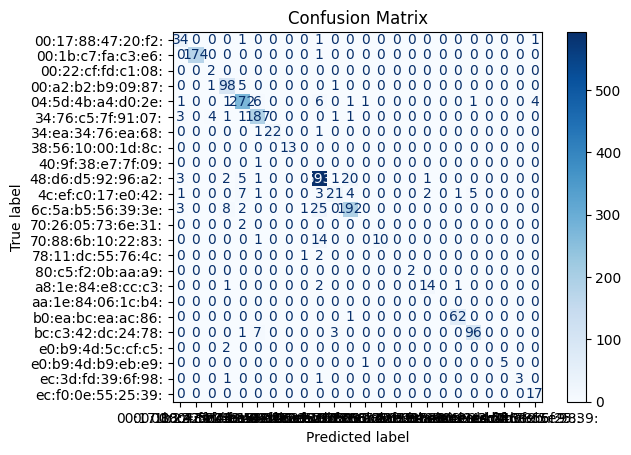

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sample = pd.read_csv("sample.csv")
column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
sample.columns = column_names
sample.head()

# heads = sample.drop(columns = ['dataset', 'start_date', 'start_time', 'IoTMac', 'IoTIP'])
heads = sample.drop(columns = ['dataset', 'start_date', 'start_time', 'IoTMac', 'IoTIP', 'IoTIP_int', 'IoTPort'])
data = pd.get_dummies(heads)
classes = sample['IoTMac']

X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

labels = sorted(set(y_train) | set(y_test))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)


correct_classifications = cm.diagonal().sum()
all = cm.sum()
print("Number of correctly classified elements:", correct_classifications)
print("correct divide all:", correct_classifications/all)



# Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()






                    precision    recall  f1-score   support

00:17:88:47:20:f2:       0.00      0.00      0.00        50
00:1b:c7:fa:c3:e6:       0.87      1.00      0.93       169
00:22:cf:fd:c1:08:       0.00      0.00      0.00         2
00:a2:b2:b9:09:87:       0.00      0.00      0.00       131
04:5d:4b:a4:d0:2e:       1.00      0.01      0.03       280
34:76:c5:7f:91:07:       0.18      0.94      0.30       202
34:ea:34:76:ea:68:       0.00      0.00      0.00        27
38:56:10:00:1d:8c:       0.00      0.00      0.00        14
48:d6:d5:92:96:a2:       0.52      0.57      0.55       666
4c:ef:c0:17:e0:42:       0.00      0.00      0.00        40
6c:5a:b5:56:39:3e:       0.00      0.00      0.00       188
70:26:05:73:6e:31:       0.00      0.00      0.00         1
70:88:6b:10:22:83:       0.00      0.00      0.00        17
78:11:dc:55:76:4c:       0.00      0.00      0.00         1
80:c5:f2:0b:aa:a9:       0.00      0.00      0.00         4
a8:1e:84:e8:cc:c3:       0.00      0.00

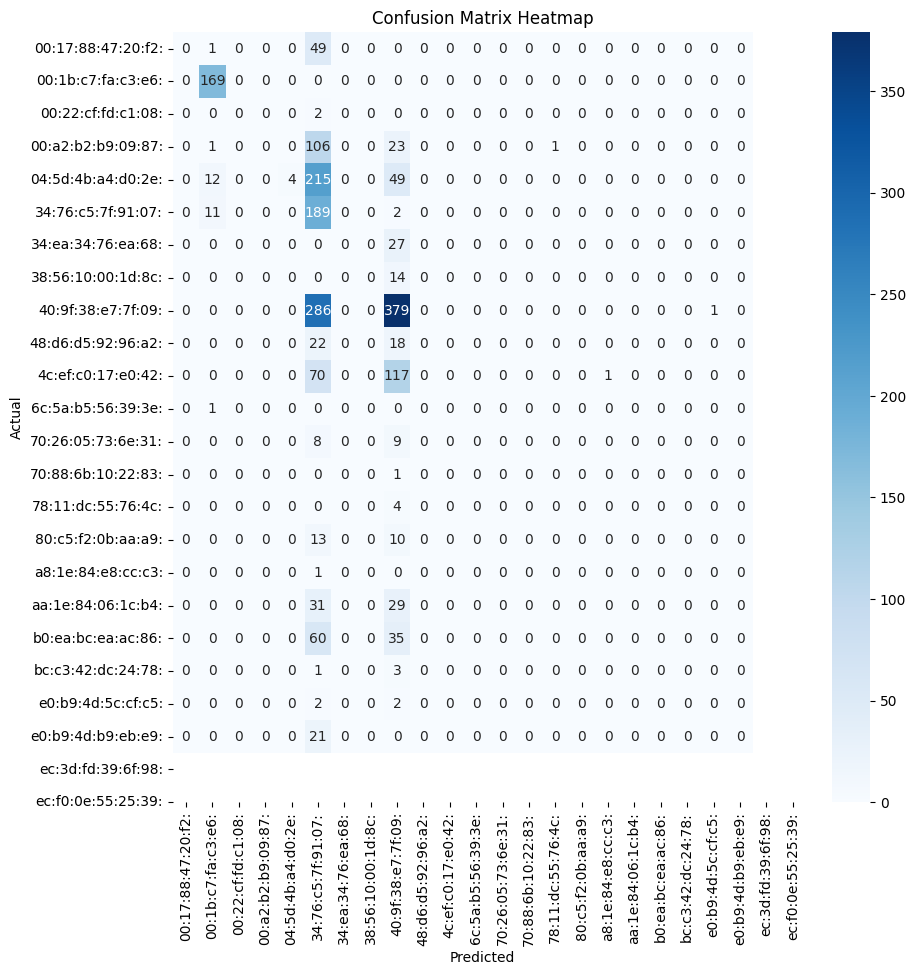

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dropped dataset, IoTIP_int, hostIP_int, year_month
# df = pd.read_csv('sample.csv')
df = pd.read_csv("sample.csv")
column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
df.columns = column_names
df.head()
X = df.drop(columns=['IoTMac'])
y = df['IoTMac']

# Defines categorical variables
categories = ['IoTMac', 'hostMac', 'IoTIP', 'hostIP', 'ipProto', 'reverseFlowExists', 'remote', 'broadcast', 'HTTP', 'HTTPS', 'DNS', 'NTP', 'TCP_others', 'UDP_others']
for var in categories:
    df[var] = df[var].astype('category')

X = pd.get_dummies(X, drop_first=True)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=10)

# Fits the model on the training data using Naive Bayes
model = GaussianNB()
model.fit(XTrain, yTrain)

yPred = model.predict(XTest)
print(classification_report(yTest, yPred, zero_division=0))

# Shows true positives, true negatives, false positives, false negatives
confusionMatrix = confusion_matrix(yTest, yPred)
correct_classifications = confusionMatrix.diagonal().sum()
all = confusionMatrix.sum()
print("Number of correctly classified elements:", correct_classifications)
print("correct divide all:", correct_classifications/all)
# Heatmap visualisation of the Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [2]:
import pandas as pd
newSample = pd.read_csv("newSample.csv")
newSample.head()

,start_date,start_time,duration,reverseDelta,IoTMac,hostMac,IoTIP,hostIP,ipProto,IoTPort,...,reverseAvgPacketSize,reverseFlowExists,remote,broadcast,HTTP,HTTPS,DNS,NTP,TCP_others,UDP_others
0,2019-09-25,06:50:15,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,239.255.255.250,17,33033,...,0,0,1,0,0,0,0,0,0,1
1,2019-08-12,21:01:27,0.000,0.000,48:d6:d5:92:96:a2:,38:d5:47:0c:25:d4:,192.168.1.184,192.168.1.1,17,33789,...,0,0,0,0,0,0,1,0,0,0
2,2019-09-19,06:31:15,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,239.255.255.250,17,46713,...,0,0,1,0,0,0,0,0,0,1
3,2019-08-16,02:58:57,0.434,0.012,04:5d:4b:a4:d0:2e:,38:d5:47:0c:25:d4:,192.168.1.124,74.125.102.41,6,53460,...,1359,1,1,0,0,1,0,0,1,0
4,2019-07-29,03:03:10,0.000,0.000,00:1b:c7:fa:c3:e6:,01:00:5e:7f:ff:fa:,192.168.1.236,239.255.255.250,17,48008,...,0,0,1,0,0,0,0,0,0,1
